In [19]:
import backtesting

In [11]:
!pip install pandas-ta


In [12]:
import pandas_ta as ta



In [10]:
import talib


ModuleNotFoundError: No module named 'talib'

In [1]:
import datetime
import pandas_ta as ta
import pandas as pd


In [20]:
from backtesting import Backtest,Strategy
from backtesting.lib import crossover
from backtesting.test import GOOG



In [29]:
class Rsi(Strategy):
    
    
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14
    
    
    def init(self):
        
        self.rsi = self.I(ta.rsi,pd.Series(self.data.Close),self.rsi_window)
        
    def next(self):
        
        if crossover(self.rsi,self.upper_bound):
            self.position.close()
            
        elif crossover(self.lower_bound, self.rsi):
            self.buy()
            
            
bt= Backtest(GOOG,Rsi,cash=10000,commission=0.002)
stats=bt.run()

stats
        
        
        


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   29.329609
Equity Final [$]                  15411.94704
Equity Peak [$]                   15570.14704
Return [%]                           54.11947
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    5.205671
Volatility (Ann.) [%]               23.556885
Sharpe Ratio                         0.220983
Sortino Ratio                        0.369511
Calmar Ratio                           0.1055
Max. Drawdown [%]                  -49.342925
Avg. Drawdown [%]                   -6.457642
Max. Drawdown Duration     1609 days 00:00:00
Avg. Drawdown Duration       99 days 00:00:00
# Trades                                    9
Win Rate [%]                        77.777778
Best Trade [%]                      21.155672
Worst Trade [%]                    -20.607876
Avg. Trade [%]                    

In [17]:
stats

<bound method Backtest.run of <backtesting.backtesting.Backtest object at 0x7f443b0c94c0>>

In [30]:
bt.plot()

Row(id='2288', ...)

In [31]:
class Rsi(Strategy):
    
    
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14
    
    
    def init(self):
        
        self.rsi = self.I(ta.rsi,pd.Series(self.data.Close),self.rsi_window)
        
    def next(self):
        
        if crossover(self.rsi,self.upper_bound):
            self.position.close()
            
        elif crossover(self.lower_bound, self.rsi):
            self.buy()
            
            
bt= Backtest(GOOG,Rsi,cash=10000,commission=0.002)
stats=bt.optimize(
        upper_bound = range(50,85,5),
        lower_bound = range(15,45,5),
        rsi_window = range(10,30,2),
        maximize='Equity Final [$]')

stats
        
        
        


/home/saurav/anaconda3/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/9 [00:00<?, ?it/s]

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   78.957169
Equity Final [$]                  46126.80588
Equity Peak [$]                   46642.65588
Return [%]                         361.268059
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    19.64484
Volatility (Ann.) [%]               36.294372
Sharpe Ratio                         0.541264
Sortino Ratio                        1.014582
Calmar Ratio                         0.326025
Max. Drawdown [%]                  -60.255605
Avg. Drawdown [%]                   -4.913526
Max. Drawdown Duration      786 days 00:00:00
Avg. Drawdown Duration       50 days 00:00:00
# Trades                                    8
Win Rate [%]                             87.5
Best Trade [%]                       46.29042
Worst Trade [%]                     -1.039138
Avg. Trade [%]                    

In [32]:
bt.plot()

Row(id='3100', ...)

In [33]:
import seaborn as sns


/home/saurav/anaconda3/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/9 [00:00<?, ?it/s]

NameError: name 'plt' is not defined

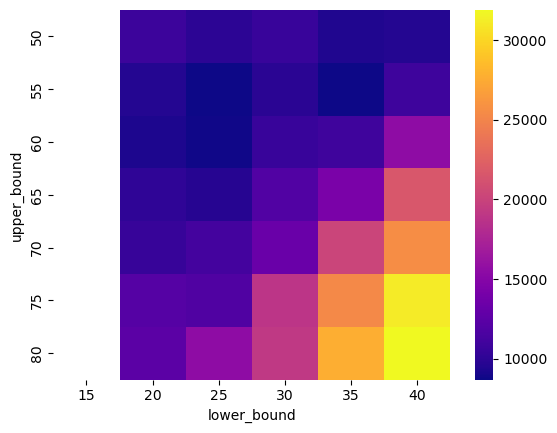

In [34]:
class Rsi(Strategy):
    
    
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14
    
    
    def init(self):
        
        self.rsi = self.I(ta.rsi,pd.Series(self.data.Close),self.rsi_window)
        
    def next(self):
        
        if crossover(self.rsi,self.upper_bound):
            self.position.close()
            
        elif crossover(self.lower_bound, self.rsi):
            self.buy()
            
            
stats, heatmap = bt.optimize(
        upper_bound = range(50,85,5),
        lower_bound = range(15,45,5),
        rsi_window = range(10,30,2),
        maximize='Equity Final [$]',
        return_heatmap=True)

hm = heatmap.groupby(["upper_bound","lower_bound"]).mean().unstack()
sns.heatmap(hm, cmap="plasma")
plt.show()
        
        
        
